In [12]:
import kagglehub
import pandas as pd
import seaborn as sns
from joblib import dump

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulszz/spotify-most-streamed-songs")

print("Path to dataset files:", path)

100%|██████████| 60.0k/60.0k [00:00<00:00, 29.6MB/s]

Extracting files...
Path to dataset files: /Users/markol/.cache/kagglehub/datasets/abdulszz/spotify-most-streamed-songs/versions/2


In [7]:
# download the dataset
path = kagglehub.dataset_download("joebeachcapital/30000-spotify-songs")

print("Path to dataset files:", path)

Path to dataset files: /Users/markol/.cache/kagglehub/datasets/joebeachcapital/30000-spotify-songs/versions/2


In [3]:
# loading data
file_path = 'spotify_songs.csv'
df = pd.read_csv(file_path)

# selecting features of interest
columns_to_preserve = ['track_id', 'energy', 'key', 'loudness', 'mode', 'tempo', 'duration_ms', 'track_popularity']
df = df[columns_to_preserve]


In [4]:
pd.isnull(df).sum()


track_id            0
energy              0
key                 0
loudness            0
mode                0
tempo               0
duration_ms         0
track_popularity    0
dtype: int64

## XGBoost

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
features = ['energy', 'key', 'loudness', 'mode', 'tempo', 'duration_ms']
target = 'track_popularity'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


dump(scaler, "scaler.joblib")


# Initialize the XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=500,  # Number of trees
    learning_rate=0.05,  # Step size shrinkage
    max_depth=6,  # Maximum tree depth
    subsample=0.8,  # Fraction of samples for each tree
    colsample_bytree=0.8,  # Fraction of features for each tree
    random_state=42
)

In [8]:
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:24.83136
[1]	validation_0-rmse:24.78251
[2]	validation_0-rmse:24.73988
[3]	validation_0-rmse:24.68658
[4]	validation_0-rmse:24.64056
[5]	validation_0-rmse:24.58848
[6]	validation_0-rmse:24.53093
[7]	validation_0-rmse:24.50074
[8]	validation_0-rmse:24.47239
[9]	validation_0-rmse:24.42434
[10]	validation_0-rmse:24.38267
[11]	validation_0-rmse:24.34445
[12]	validation_0-rmse:24.31097
[13]	validation_0-rmse:24.25468
[14]	validation_0-rmse:24.22272
[15]	validation_0-rmse:24.18122
[16]	validation_0-rmse:24.13811
[17]	validation_0-rmse:24.10397
[18]	validation_0-rmse:24.07525
[19]	validation_0-rmse:24.05983
[20]	validation_0-rmse:24.02171
[21]	validation_0-rmse:23.99818
[22]	validation_0-rmse:23.97126
[23]	validation_0-rmse:23.95969
[24]	validation_0-rmse:23.92554
[25]	validation_0-rmse:23.90034
[26]	validation_0-rmse:23.88806
[27]	validation_0-rmse:23.86436
[28]	validation_0-rmse:23.84764
[29]	validation_0-rmse:23.83730
[30]	validation_0-rmse:23.82425
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [9]:
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")

Test MAE: 19.057085067945945
Test MSE: 523.7196174803296


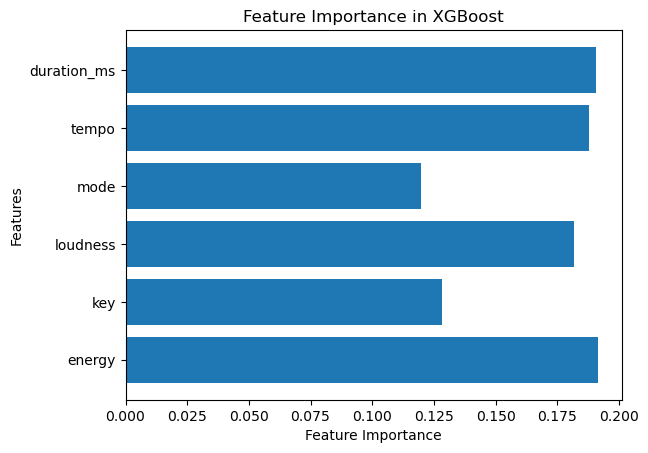

In [10]:
import matplotlib.pyplot as plt
plt.barh(features, xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()

In [11]:
xgb_model.save_model("xgb_popularity_model.json")

## Lasso

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [45]:
# set features and target variables
features = ['energy', 'key', 'loudness', 'mode', 'tempo']
target = 'track_popularity'

X = df[features]
y = df[target]

# splt data into test/training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
lasso_model = Lasso(alpha=0.06, random_state=42)

# Train the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.06, random_state=42)

In [62]:
# Make predictions
y_pred = lasso_model.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")

Test MAE: 20.399073452657245
Test MSE: 594.463238321629


In [64]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lasso_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
    Feature  Coefficient
2  loudness     5.856780
3      mode     0.397438
4     tempo     0.218757
1       key     0.000000
0    energy    -6.702805


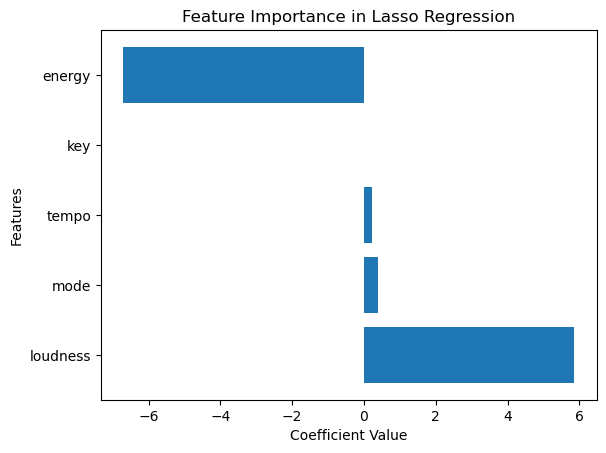

In [65]:
# Plot the coefficients
import matplotlib.pyplot as plt
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Lasso Regression")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import joblib  # Optional: if you saved the model

# Load your trained model (if saved earlier)
# lasso_model = joblib.load("lasso_model.pkl")  # Uncomment if loading from file

# Example input data for a new song (replace these values with your song's features)
# Ensure the order matches ['energy', 'key', 'loudness', 'mode', 'tempo']
new_song_features = {
    'energy': 0.75,
    'key': 5,
    'loudness': -8.0,
    'mode': 1,
    'tempo': 120.0
}

# Convert the input to a DataFrame
new_song_df = pd.DataFrame([new_song_features])

# Apply the same scaling as used during training
scaler = StandardScaler()
scaler.fit(X)  # X is your original training features
new_song_scaled = scaler.transform(new_song_df)

# Predict using the trained model
predicted_popularity = lasso_model.predict(new_song_scaled)

# Display the result
print(f"Predicted Track Popularity: {predicted_popularity[0]}")
